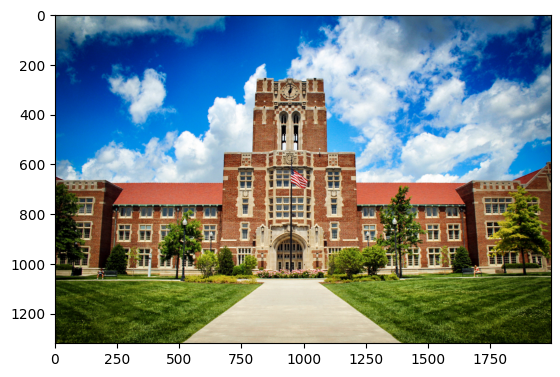

In [9]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import numpy as np
# Read in the image
image = cv2.imread('ayreshall.jpeg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Question 1 (40 points): Create a function that takes as input the image file name and
the number of colors to find (clusters to find) and returns the updated image based on the
new clusters. (Note: Your function can also return other elements as needed for plotting.)
This function will use the scikit-learn KMeans function to find the cluster centers and which
pixels belong to which clusters. You will then create an updated image that replaces each 1
pixel value with its corresponding cluster center value. Note that the scikit-learn cluster
centers may not be integers. You should convert the cluster centers to integers using floor().
We recommend setting the random state option in K-Means function to a fixed value for
repeatable results

In [10]:
def ChangeImage(imageFile, numColors):
    image = cv2.imread(imageFile)
    # Change color to RGB (from BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x,y = image.shape[0], image.shape[1]
    #converting a 3D image to a 2D matrix
    converted = image.reshape((-1,3))
    
    kmean = KMeans(n_clusters=numColors, random_state = 62)
    kmean.fit(converted)
    pix_clus = kmean.predict(converted)

    center = np.floor(kmean.cluster_centers_)

    for i in range(len(converted)):
        converted[i] = center[pix_clus[i]]
    # print(center,pix_clus)
    # print(converted)
    
    new_img = converted.reshape((x,y,3))

    return new_img, kmean.labels_ 
    #so we did all the above to find the center
    # now loop image and use distance formula and change pixelse 



Question 2 (40 points – 10 for each image): For each of the four images, try K=4, K=8,
and K=16 and visualize the updated image with the new colors based on the cluster centers.
You should include a 2x2 figure for each image that shows the original image and the three
updated images for the different values of K. Include a brief discussion of which images look
acceptable (capturing the details of the original image) and which ones do not. For those
that do not look acceptable, comment in the report on why they do not look acceptable
(based on which colors were selected as cluster centers).

In [11]:
def Plot4(img1,img2,img3,img4,name):
    # create figure
    fig = plt.figure(figsize=(10, 7))
  
    # setting values to rows and column variables
    rows = 2
    columns = 2
    fig.add_subplot(rows, columns, 1)
    plt.imshow(img1)
    plt.axis('off')
    plt.title("Orignial")

    fig.add_subplot(rows, columns, 2)
    plt.imshow(img2)
    plt.axis('off')
    plt.title("K = 4")

    fig.add_subplot(rows, columns, 3)
    plt.imshow(img3)
    plt.axis('off')
    plt.title("K = 8")

    fig.add_subplot(rows, columns, 4)
    plt.imshow(img4)
    plt.axis('off')
    plt.title("K = 12")


    plt.savefig("{}updated2X2.jpeg".format(name))

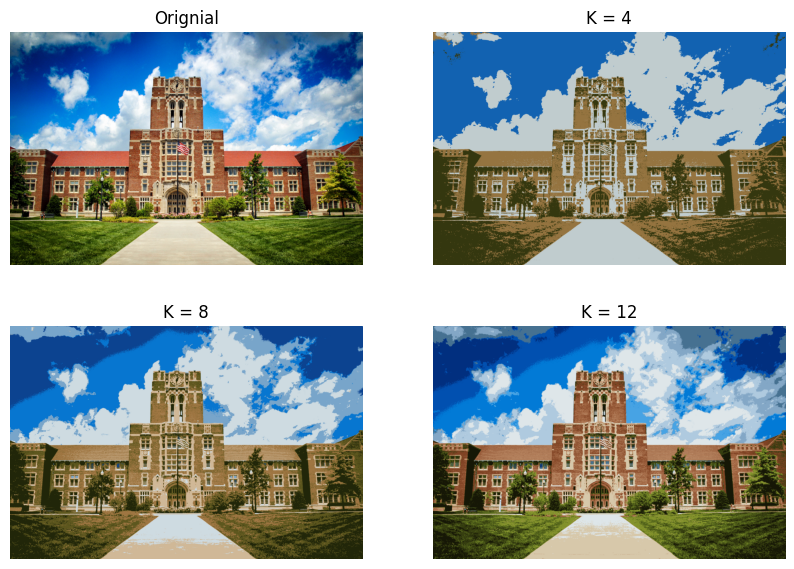

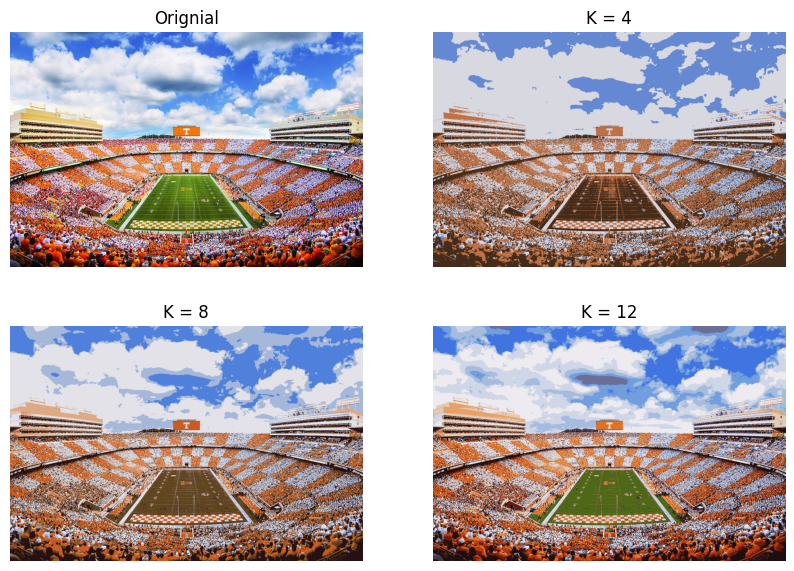

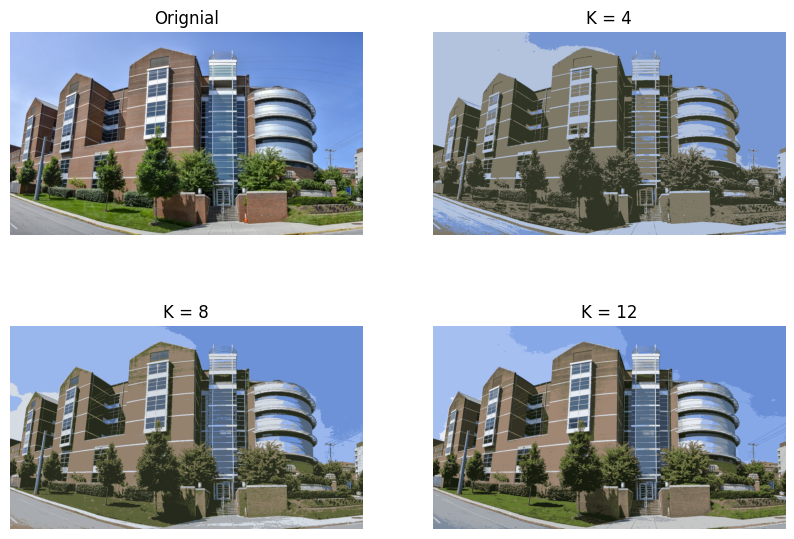

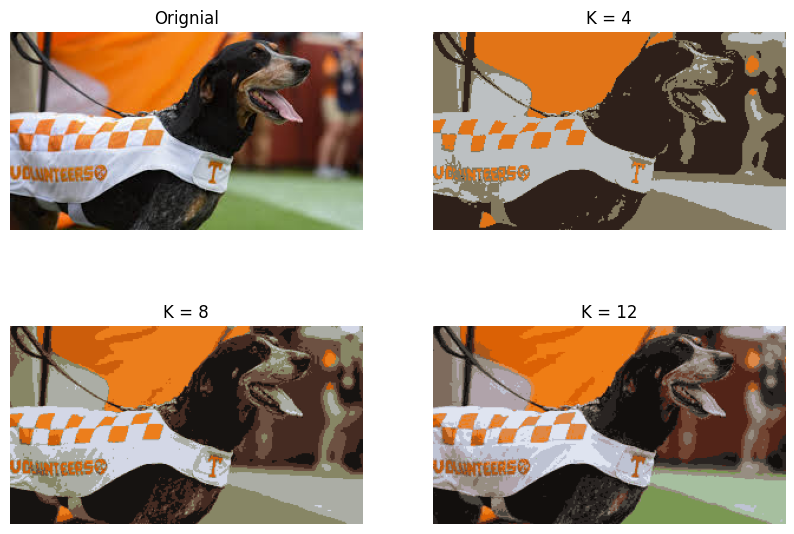

In [12]:
img_name = ["ayreshall.jpeg","checkerneyland.jpeg","minkao.jpeg","smokey.jpeg"]
K = [4,8,16]
histo = [[],[],[],[]]
for i,name in enumerate(img_name):
    img1 = cv2.imread(name)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    
    img2, img2_2D = ChangeImage(name,4)
    img3, img3_2D = ChangeImage(name,8)
    img4, img4_2D = ChangeImage(name,16)

    histo[i].append(img2_2D)
    histo[i].append(img3_2D)
    histo[i].append(img4_2D)

    Plot4(img1,img2,img3,img4,name)

Question 3 (20 points – 5 for each image): For each image, create three histogram plots
(one for each value of K) showing the distribution of pixel values across the different cluster
centers (how many pixels in the image below to each cluster)

In [13]:
img_nam = ["ayreshall","checkerneyland","minkao","smokey"]

for i in range(4):
    for j in range(3):
        k = (j+1)*4
        plt.hist(histo[i][j], bins = k)
        plt.title("{} K = {}.jpeg".format(img_nam[i],(j+1)*4))
        plt.xlabel("K = {}".format(k))
        plt.ylabel("Pixel values")
        plt.savefig("{} K = {}.jpeg".format(img_nam[i],(j+1)*4))

        plt.clf()


<Figure size 640x480 with 0 Axes>